In [1]:
import torch
import torch.optim as optim
import matplotlib.pyplot as plt

# Energy Model

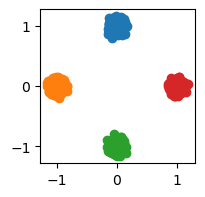

In [4]:
import sys
sys.path.append("/Users/tiejean/Documents/Education/Implementations/mlHlpers")

from modules.mlp import MLP
from modules.energy_model import EnergyModel
from utils.data import sample_circular_gmm

data, data_info = sample_circular_gmm(5000, num_modes=4, viz=True)

batch_size = 1000
input_dim = 2
output_dim = 1
mlp = MLP([input_dim, 64, output_dim])
energy_model = EnergyModel(mlp, input_dim)

optimizer = optim.Adam(energy_model.parameters(), lr=1e-3)

energy_model.train(data, optimizer, batch_size, n_iter=1000)


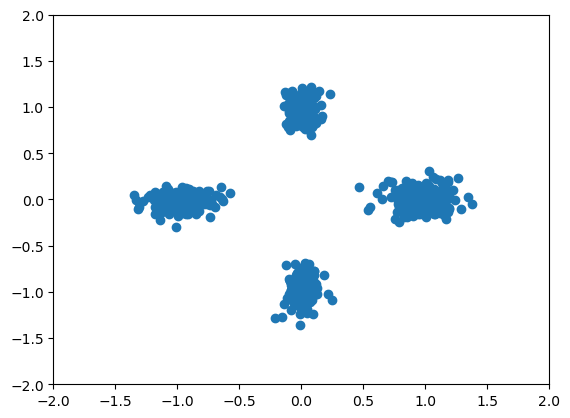

In [6]:
x0 = torch.randn((1000,2))
xx = energy_model.langevin_sampler(x0,  n_steps=1000, step_size=0.001)
plt.figure()
plt.scatter(xx[:,0], xx[:,1])
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.show()

# GAN

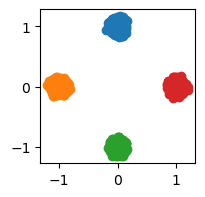

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

import sys
sys.path.append("/Users/tiejean/Documents/Education/Implementations/mlHlpers")

from modules.mlp import MLP
from modules.gan import GAN
from utils.data import sample_circular_gmm

data, data_info = sample_circular_gmm(8000, num_modes=4, viz=True)

batch_size = 1000
data_dim = 2
noise_dim = 2
generator = MLP([noise_dim, 128, 128, 128, 128, data_dim])
discriminator = MLP([data_dim, 128, 128, 1])
gan = GAN(generator, discriminator, nn.BCEWithLogitsLoss(), noise_dim=noise_dim)

optimizer_g = optim.Adam(generator.parameters(), lr=0.0005, betas = (0.5, 0.999))
optimizer_d = optim.Adam(discriminator.parameters(), lr=0.0005, betas= (0.5, 0.999))

losses_d, losses_g = gan.train(data, optimizer_g, optimizer_d, batch_size, n_iter=5000, n_discrimitor_inner_step=10, n_generator_inner_step=1)

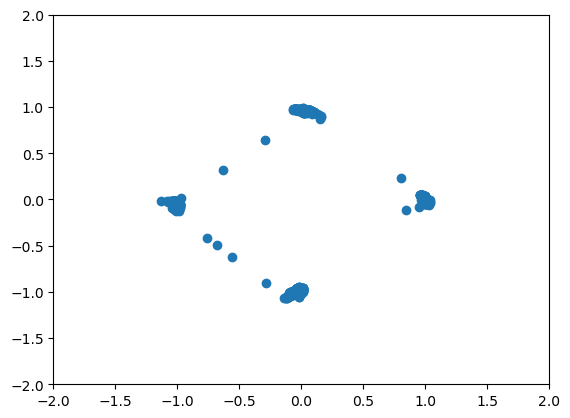

In [6]:
points = gan.sample(n_points=1000)

plt.figure()
plt.scatter(points[:,0], points[:,1])
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.show()

# Rectified Flow

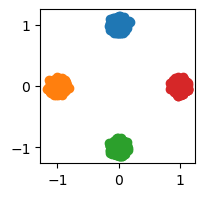

In [11]:
import torch
import torch.optim as optim
import matplotlib.pyplot as plt

import sys
sys.path.append("/Users/tiejean/Documents/Education/Implementations/mlHlpers")

from modules.mlp import MLP
from modules.rectified_flow import RectifiedFlow
from utils.data import sample_circular_gmm

data, data_info = sample_circular_gmm(5000, num_modes=4, viz=True)

batch_size = 1000
dim = 2
mlp = MLP([dim+1, 64, dim])
rectified_flow = RectifiedFlow(mlp, dim)

optimizer = optim.Adam(rectified_flow.parameters(), lr=5e-4)
losses = rectified_flow.train(data, optimizer, batch_size, n_iter=8000)

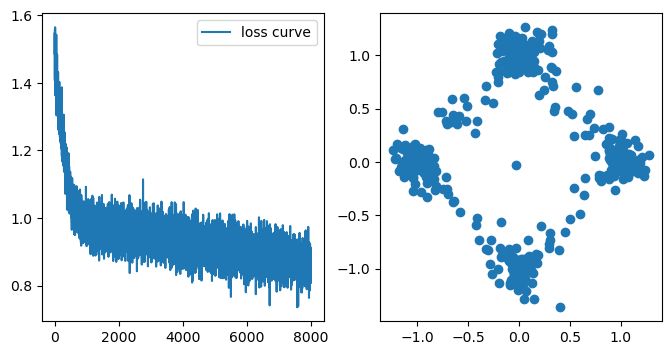

In [12]:
points = rectified_flow.euler_sample(n_points=500, n_steps=100)

plt.figure(figsize=(4*2,4))
plt.subplot(121)
plt.plot(losses, label='loss curve')
plt.legend()
plt.subplot(122)
plt.scatter(points[:,0], points[:,1])
plt.show()